# Theory

Let's call a given natal kick distribution model $M(\vec{\theta})$, where $\vec{\theta} = \{v_{ns}, \sigma_{ns}\}$ for the Mandel Muller 2020 model.

Any given pulsar data set from Deller can be expressed as a collection of equally likely data points $\{d_i\}$.

Then, the likelihood of reproducing the data set using our model is given by:
$$p(d_i | M) = \int p(d_i | v_i) \cdot p(v_i|M) \cdot d v_i$$

Using the data files from Deller, we can compute the posterior on the velocity distribution as: 
$$p(v_i | d_i) = \frac{p(d_i | v_i) \cdot \pi(v_i)}{p(d_i)}$$
where $\pi(v_i)$ is our prior on the velocity distribution, and $p(d_i)$ is a normalization.


We will assume a flat prior $\pi$, and we will ignore the normalization factor $p(d_i)$ since it doesn't affect the probability distribution, i.e. it is independent of $v_i$.

Therefore, we can make the simplifying assumption that 
$$p(v_i|d_i) = p(d_i|v_i).$$

We can now re-write the likelihood equation as:
$$p(d_i | M) \approx \int p(v_i | d_i) \cdot p(v_i|M) \cdot d v_i .$$

$p(v_i | d_i)$ can be read off from the posterior data, since it is simply the probability distribution of the velocity measurements.

Thus, the probability of drawing a given pulsar $d_i$ from a model $M$ is given by:
$$p(d_i|M) = \langle p(v_i | M) \rangle.$$

Here, $p(v_i|M)$ is the probability of drawing a given velocity, which appears in the data set, from model $M$. The average over all these probabilities gives the overall probability of drawing this pulsar from the model.

Finally, the probability of drawing all $N$ pulsars from model M is
$$p(d|M) = \prod_{i=1}^{N} p(d_i|M).$$

To get $p(v_i|M)$, for now we will simply assume that the model velocities are transverse. In general, this is a poor assumption. We must project all the velocities along isotropically distributed planar directions to get a modeled probability distribution for Transverse Velocity.

# Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import time

In [2]:
from natal_kick_tools import mandel_muller_sim_functions as msf

In [3]:
# this is just a little function that we will use to make the plot more beautiful (bigger ticks, labels)
# However, you do not have to use this (just uncommoment "layoutAxes" everywhere)
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)
def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 18, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


# Combined Probability using all Pulsars (Library implementation)

In [4]:
# Define the models of interest
bh_kicks=[200]
ns_kicks = [400]
sigmas = [0.3]

# Define the location of the posterior data
pulsar_data_loc = "../correctedPulsarPosteriors/correctedVtData"

In [5]:
start = time.time() 
p_pulsar_given_model = msf.get_pulsar_probability(pulsar_data_loc, bh_kick=200, ns_kick=400, sigma=0.3)
end = time.time()
print("Calculation completed in:", end - start, "s")

Loading Mandel Muller model data from ../COMPAS_runs/bh_200_ns_400_sigma_0.3_combined.h5
Successfully read 89 data files
Calculated likelihoods for 89 pulsars in: 0.17701458930969238 s
Writing pulsar probabilities to file: ../calculatedModelLikelihoods/v_ns_400_sigma_0.3
Calculation Complete!
Calculation completed in: 20.820785999298096 s


# Probability for a single pulsar (Library implementation)

In [6]:
# Pulsar Data
file = "../correctedPulsarPosteriors/correctedVtData/J0034-0721.corr-vT.bootstraps"
ra, dec, pmra, pmdec, px, vt = np.loadtxt(file, unpack=True)

# Model Data
SN_KICKS_NS, SN_KICKS_BH, NS_KICK_MULT, SIGMAS = msf.load_local_sim_data(sigmas=[0.3])

Loading Mandel Muller model data from ../COMPAS_runs/bh_200_ns_400_sigma_0.3_combined.h5


In [7]:
p_vi_M = msf.p_vi_from_model(vt, SN_KICKS_NS)

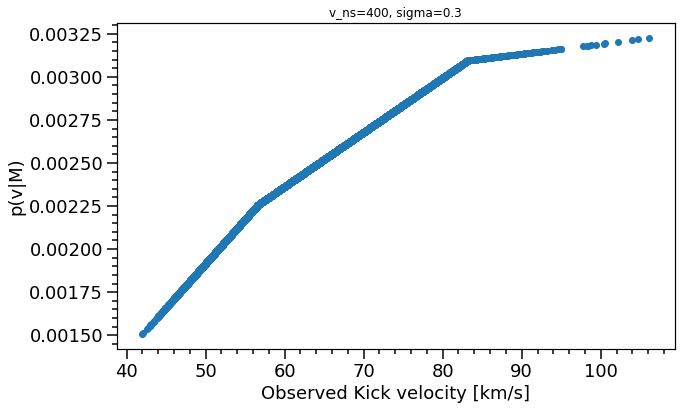

In [8]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

plt.scatter(vt, p_vi_M)

layoutAxes(ax=ax, nameX='Observed Kick velocity [km/s]',\
           nameY='p(v|M)')

plt.title(f"v_ns={NS_KICK_MULT[0]}, sigma={SIGMAS[0]}")
          
plt.show()

In [9]:
p_v_M_avg = np.average(p_vi_M)
print("Probability of drawing Pulsar J0034-0721 from Mandel Muller with v_ns=400, sigma=0.3 =", p_v_M_avg)

Probability of drawing Pulsar J0034-0721 from Mandel Muller with v_ns=400, sigma=0.3 = 0.0024279563020852437


# Visualizing the Data

## Deller Data

The data is organized as:

ra (deg), dec (hr), pmra (mas/yr), pmdec (mas/yr), px (mas), corrected vTrans (km/s) 

In [10]:
file = "../correctedPulsarPosteriors/correctedVtData/J0034-0721.corr-vT.bootstraps"
ra, dec, pmra, pmdec, px, vt = np.loadtxt(file, unpack=True)

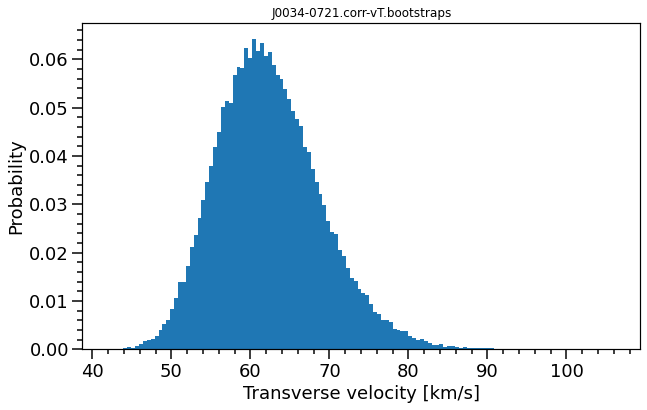

In [11]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

plt.hist(vt, density=True, bins="scott") # Set optimal bins using Scott's rule

layoutAxes(ax=ax, nameX='Transverse velocity [km/s]',\
           nameY='Probability')

plt.title("J0034-0721.corr-vT.bootstraps")
plt.show()

## COMPAS Simulation of Model(v_ns=400, sigma=0.3) 

In [12]:
SN_KICKS_NS, SN_KICKS_BH, NS_KICK_MULT, SIGMAS = msf.load_local_sim_data(sigmas=[0.3])

Loading Mandel Muller model data from ../COMPAS_runs/bh_200_ns_400_sigma_0.3_combined.h5


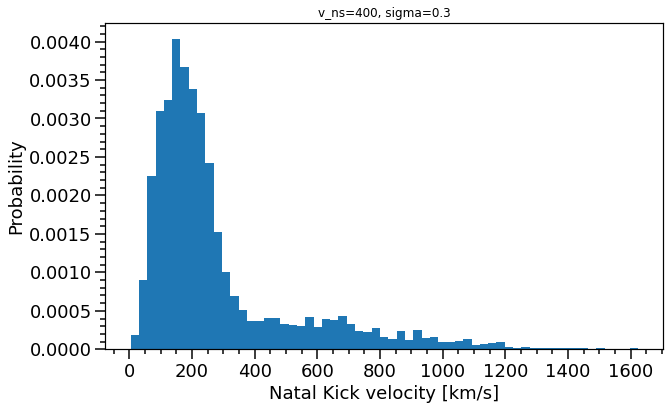

In [13]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

plt.hist(SN_KICKS_NS, density=True, bins="scott") # Set optimal bins using Scott's rule

layoutAxes(ax=ax, nameX='Natal Kick velocity [km/s]',\
           nameY='Probability')

plt.title(f"v_ns={NS_KICK_MULT[0]}, sigma={SIGMAS[0]}")
          
plt.show()

# [DEPRECATED] Computing the probability of Model(v_ns=400, sigma=0.3) 

In [14]:
from scipy import interpolate

In [15]:
y,x = np.histogram(SN_KICKS_NS, density=True, bins="scott")
prob_M = interpolate.interp1d(x[:-1], y, bounds_error=False, fill_value=0)

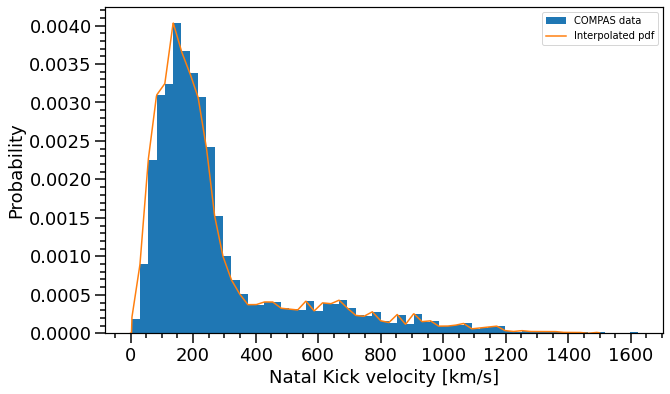

In [16]:
x_grid = np.linspace(0, 1500, 1000)
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

plt.hist(SN_KICKS_NS, density=True, bins="scott", label='COMPAS data') # Set optimal bins using Scott's rule

layoutAxes(ax=ax, nameX='Natal Kick velocity [km/s]',\
           nameY='Probability')

plt.plot(x_grid, prob_M(x_grid), label='Interpolated pdf')

plt.legend()

plt.show()

In [17]:
start = time.time() 

p_vi_M = prob_M(vt)

end = time.time()
print("time elapsed:", end - start)

time elapsed: 0.0017819404602050781


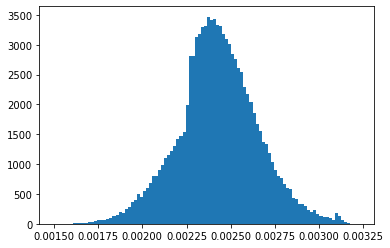

In [18]:
plt.hist(p_vi_M, bins=100)
plt.show()

In [19]:
p_v_M_avg = np.average(p_vi_M)

In [20]:
print("Probability of drawing Pulsar J0034-0721 from Mandel Muller with v_ns=400, sigma=0.3 =", p_v_M_avg)

Probability of drawing Pulsar J0034-0721 from Mandel Muller with v_ns=400, sigma=0.3 = 0.0024279563020852437


# [DEPRECATED] Calculating the Probabilities of all 89 pulsars

In [21]:
# Takes about 20 s
start = time.time()

vt_all = []

for file in glob.glob('../correctedPulsarPosteriors/correctedVtData/*.bootstraps'):
    vt_all.append(np.loadtxt(file, unpack=True, usecols=5))

end = time.time()
print(end - start)

21.38395404815674


In [22]:
ns_kicks = [400]
sigmas = [0.3]
SN_KICKS_NS, SN_KICKS_BH, NS_KICK_MULT, SIGMAS = msf.load_local_sim_data(ns_kicks=ns_kicks, sigmas=sigmas)

Loading Mandel Muller model data from ../COMPAS_runs/bh_200_ns_400_sigma_0.3_combined.h5


In [23]:
len(vt_all)

89

In [24]:
model = SN_KICKS_NS[0]
p_vi_M_all = np.empty(len(vt_all), dtype=object)

In [25]:
start = time.time()    

for i in range(len(vt_all)):
    p_vi_M_all[i] = msf.p_vi_from_model(vt_all[i], model)

end = time.time()
print("time elapsed:", end - start, "s")

time elapsed: 84.41941905021667 s


In [26]:
np.average(p_vi_M_all[0])

0.0024279563020852437

In [27]:
p_di_M = np.empty(len(p_vi_M_all))

for i in range(len(p_vi_M_all)):
    p_di_M[i] = np.average(p_vi_M_all[i])

In [28]:
p_di_M

array([0.00242796, 0.00032709, 0.00173972, 0.00372461, 0.00035675,
       0.00290942, 0.00095204, 0.00268389, 0.00219919, 0.00156724,
       0.00042119, 0.00357174, 0.00377762, 0.00160566, 0.00129943,
       0.00025594, 0.0035562 , 0.00339915, 0.00185545, 0.00111157,
       0.00155921, 0.00140774, 0.00370491, 0.00200183, 0.00345265,
       0.00224218, 0.00078849, 0.00350983, 0.00208862, 0.00356859,
       0.00338458, 0.00146335, 0.00038943, 0.00374489, 0.00314342,
       0.00355867, 0.00035179, 0.00176633, 0.00122712, 0.00041748,
       0.00036346, 0.00088756, 0.00074806, 0.00261528, 0.00014128,
       0.00344983, 0.00116209, 0.00226101, 0.00301678, 0.00322556,
       0.0027163 , 0.00045804, 0.00139555, 0.00031496, 0.00357766,
       0.00039768, 0.00326663, 0.00366113, 0.00126739, 0.00137308,
       0.00137231, 0.00072704, 0.00296822, 0.00024119, 0.00089274,
       0.00161837, 0.00386243, 0.00171981, 0.00322423, 0.00123921,
       0.00025367, 0.00104359, 0.00271874, 0.00236872, 0.00216

In [29]:
print(f"v_ns_{NS_KICK_MULT[0]}_sigma_{SIGMAS[0]}")

v_ns_400_sigma_0.3


In [30]:
file = f"../calculatedModelLikelihoods/v_ns_{NS_KICK_MULT[0]}_sigma_{SIGMAS[0]}"
np.savetxt(file, p_di_M)